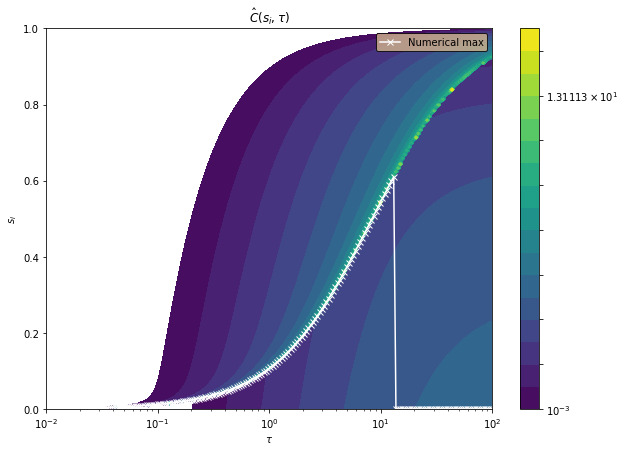

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
from scipy.optimize import root, fsolve,brentq,minimize,fminbound
%matplotlib inline
import scipy.integrate as integrate
u = np.linspace(1e-9, 1.-1e-9, 200) # savings rate
taus = np.logspace(-2, 2, 200)  # tau
S, T = np.meshgrid(u, taus)

w = 4.
r = 0.06
li= .01
delta = 0.06
#ko=100. 
#tau=1.
#del tau

def c_hat(s,tau):
    w= 0.25/(.5/tau +0.06)
    r=.5/tau +delta
    D = r - delta/s
    ko= np.max([w*li/D,0])
    gm = D * r *ko + w *li*r
    return (1.-s)*((r*ko + w*li)) #(1.-s)*((r*ko + w*r*li/D)*np.exp(s*D*tau) + w*li*(1.-r/D))

#    res = integrate.quad( lambda t: ((1.-s)*((r*ko + w*r*li/D)*np.exp(s*D*t) + \
#                                            w*li*(1.-r/D) ))*np.exp(-100*t/tau)*tau, 0, np.inf)
#    return res[0]

#     A =  r *ko + w *li*r/D
#     B = w*li*(1.-r/D)
#     #return (1./tau) *(A/(r*s - delta -1./tau)*(np.exp((r*s -delta)*tau-1)-1) - B/tau*(np.exp(-1)-1))
#     T=tau
#     gamma = (r*s-delta- (1./tau)) #((-A/gamma) +B/tau )/tau #(
#     return ((A/gamma)*(np.exp(gamma*T)-1.)  + B*(1. - np.exp(-T/tau))/tau )*tau

def c_hat_neg(s):
    w= 0.25/(.5/tau +0.06)
    r=.5/tau + delta
    D = r -delta/s
    ko= np.max([w*li/D,0])
    gm = D * r *ko + w *li*r
    return -(1.-s)*((r*ko + w*li))#-(1.-s)*((r*ko + w*r*li/D)*np.exp(s*D*tau) + w*li*(1.-r/D))

#    res = integrate.quad( lambda t: ((1.-s)*((r*ko + w*r*li/D)*np.exp(s*D*t) + \
#                                             w*li*(1.-r/D) ))*np.exp(-100*t/tau)*tau, 0, np.inf)
#    return -res[0]

#     A =  r *ko + w *li*r/D
#     B = w*li*(1.-r/D)
#     #return (1./tau) *(A/(r*s - delta -1./tau)*(np.exp((r*s -delta)*tau-1)-1) - B/tau*(np.exp(-1)-1))
#     T= tau
#     gamma = (r*s-delta- (1./tau)) #((-A/gamma) +B/tau )/tau #(
#     return -((A/gamma)*(np.exp(gamma*T)-1.)  + B*(1. - np.exp(-T/tau))/tau )*tau

def c_hat_neg2(s):
    D = r - delta/s
    #ko= w*li/D
    A =  r *ko + w *li*r/D
    B = w*li*(1.-r/D)
    T= np.inf
    gamma = (r*s-delta- (1./tau)) #-((A/gamma)*(np.exp(gamma*T)-1.)  + B*(1. - np.exp(-T/tau))*tau )/tau
    return  -((A/gamma)*(np.exp(gamma*tau) -1.)  + B*(1. - np.exp(-1.))*tau )/tau
def c_hat2(s,tau):
    D = r - delta/s
    #ko= w*li/D
    A =  r *ko + w *li*r/D
    B = w*li*(1.-r/D)
    T= np.inf
    gamma = (r*s-delta- (1./tau)) #((-A/gamma) +B/tau )/tau #(
    return ((A/gamma)*(np.exp(gamma*tau) -1.)  + B*(1. - np.exp(-1.))*tau )/tau

Z=S.copy()
for a,tt in enumerate(taus):
    for b, s in enumerate(u):
        Z[a,b]= c_hat(s,tt)
sroot=[]
for tau in taus:
    sroot.append(fminbound(c_hat_neg,1e-7,1., maxfun=40000,xtol=1e-12 ))# bounds=(1e-4,1.) ).x)#, method ='L-BFGS-B',tol=1e-12,
                        #options={'maxiter':5000000} ).x) # slsqp, tnc, L-BFGS-
fig2=plt.figure(figsize=(10,7))
ax=fig2.add_subplot(111)
#Z=Z*(Z>0)
c = ax.contourf(T, S, Z, zdir='z',norm=colors.LogNorm(),levels=np.logspace(-3,2,18))
ax.plot(taus, sroot,'wx-',label='Numerical max')

cb = plt.colorbar(c)
ll= ax.legend();frame= ll.get_frame();frame.set_facecolor('tan');frame.set_edgecolor('black')
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$s_i$')
ax.set_title(r'$\hat{C}(s_i,\tau)$')
ax.set_ylim(min(u),max(u))
ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_aspect('auto')
#fig2.savefig('C_hat_numericmax_060.pdf')

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


-15.5146928429 1.42711635585


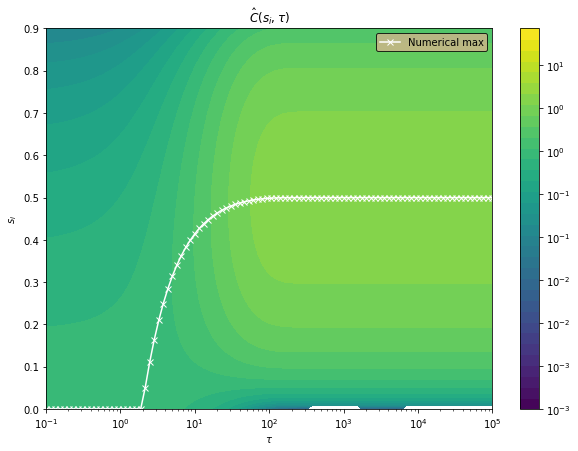

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
from scipy.optimize import root, fsolve,brentq,minimize,fminbound
%matplotlib inline
import scipy.integrate as integrate


u = np.linspace(1e-9, 0.9, 100) # savings rate
taus = np.logspace(-1, 5, 100)  # tau
S, T = np.meshgrid(u, taus)

ko=1.
L= 1.
delta = 0.06
alpha = 0.5

def kidot(K,t,s,L,alpha,delta):
    return np.sqrt(L*K)*s - delta*K # different for different alpha


def c_hat(s,tau):
    k_tau = integrate.odeint(kidot, ko, np.linspace(0,tau,2), args=(s,L,alpha,delta))[-1][0]
    k_tau = np.max([k_tau,0])
    r = alpha* np.sqrt(L/k_tau) # different for different alpha
    w = alpha* np.sqrt(k_tau/L) # different for different alpha
    c = (1.-s)*((r*k_tau + w*L)) 
    #gamma = (r*s-delta- (1./tau)) 
    #D = r -delta/s
    #A =  r *ko + w *L*r/D
    #B = w*L*(1.-r/D)
    #T = 1e8
    #c=  ((A/gamma)*(np.exp(gamma*T) -1.)  + B*(1. - np.exp(-T/tau))*tau )/tau
    #print s, k_tau, c
    return c

def c_hat_neg(s):
    k_tau = integrate.odeint(kidot, ko, np.linspace(0,tau,2), args=(s,L,alpha,delta))[-1][0]    
    r = alpha* np.sqrt(L/k_tau) # different for different alpha
    w = alpha* np.sqrt(k_tau/L) # different for different alpha
#     gamma = (r*s-delta- (1./tau)) 
#     D = r -delta/s
#     A =  r *ko + w *L*r/D
#     B = w*L*(1.-r/D)
#     T = tau
#     c=  ((A/gamma)*(np.exp(gamma*T) -1.)  + B*(1. - np.exp(-T/tau))*tau )/tau
    #print s, k_tau, c
    return -(1.-s)*((r*k_tau + w*L)) 

Z=S.copy()
for a,tt in enumerate(taus):
    for b, s in enumerate(u):
        Z[a,b]= c_hat(s,tt)
smins=[]
for tau in taus:
    smins.append(fminbound(c_hat_neg,1e-7,1., maxfun=40000,xtol=1e-12 ))# bounds=(1e-4,1.) ).x)#, method ='L-BFGS-B',tol=1e-12,
                        #options={'maxiter':5000000} ).x) # slsqp, tnc, L-BFGS-
fig2=plt.figure(figsize=(10,7))
ax=fig2.add_subplot(111)
#Z=Z*(Z>0)

print np.log(np.nanmin(Z)),np.log(np.nanmax(Z))
c = ax.contourf(T, S, Z, zdir='z',norm=colors.LogNorm(),
                levels=np.logspace(-3,np.log(np.nanmax(Z)),36))
ax.plot(taus, smins,'wx-',label='Numerical max')

#cb = plt.colorbar(c)
ll= ax.legend();frame= ll.get_frame();frame.set_facecolor('tan');frame.set_edgecolor('black')
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$s_i$')
ax.set_title(r'$\hat{C}(s_i,\tau)$')
ax.set_ylim(min(u),max(u))
ax.set_xscale('log')
#ax.set_yscale('log')

cb = plt.colorbar(c)
cb.set_ticks(np.logspace(-3,int(np.log(np.nanmax(Z))),9))
cb.set_ticklabels(np.logspace(-3,int(np.log(np.nanmax(Z))),9))
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'$ 10^{{{}}}$'.format(b)

cb.formatter = ticker.FuncFormatter(fmt)
cb.update_ticks()

ax.set_aspect('auto')
#fig2.savefig('C_hat_numericmax.pdf')

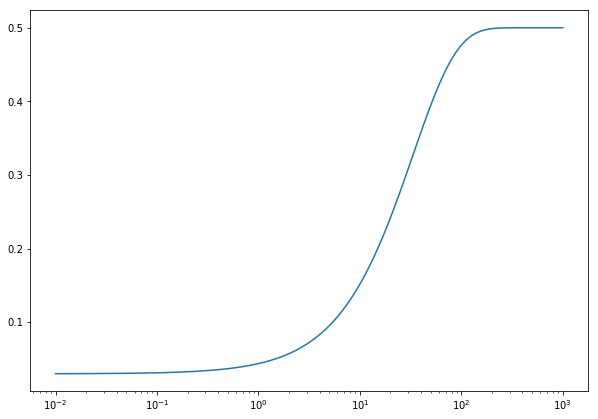

In [24]:
fig2=plt.figure(figsize=(10,7))
ax=fig2.add_subplot(111)

ax.semilogx(np.logspace(-2,3,100),0.5 - np.exp(-np.logspace(-2,3,100)*0.03)/2 + \
             np.sqrt(1.)*0.03*np.exp(-np.logspace(-2,3,100)*0.03))

-1.88000359474 9.87540912803


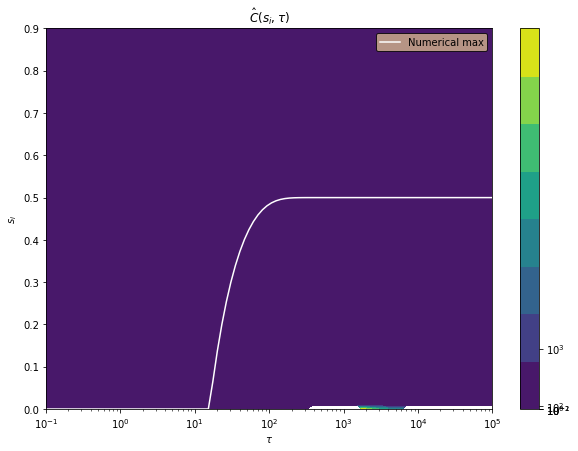

In [93]:
fig2=plt.figure(figsize=(10,7))
ax=fig2.add_subplot(111)
#Z=Z*(Z>0)

print np.log(np.nanmin(Z)),np.log(np.nanmax(Z))
c = ax.contourf(T, S, Z)#, zdir='z',norm=colors.LogNorm(),
                #levels=np.logspace(-2,np.log(np.nanmax(Z)),36))
ax.plot(taus, sroot,'w-',label='Numerical max')

#cb = plt.colorbar(c)
ll= ax.legend();frame= ll.get_frame();frame.set_facecolor('tan');frame.set_edgecolor('black')
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$s_i$')
ax.set_title(r'$\hat{C}(s_i,\tau)$')
ax.set_ylim(min(u),max(u))
ax.set_xscale('log')
#ax.set_yscale('log')

cb = plt.colorbar(c)
cb.set_ticks(np.logspace(-2,int(np.log(np.nanmax(Z))),9))
cb.set_ticklabels(np.logspace(-2,int(np.log(np.nanmax(Z))),9))
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'$ 10^{{{}}}$'.format(b)

cb.formatter = ticker.FuncFormatter(fmt)
cb.update_ticks()

ax.set_aspect('auto')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
from scipy.optimize import root, fsolve,brentq,minimize,fminbound
%matplotlib inline
import scipy.integrate as integrate


u = np.linspace(1e-9, 1.-1e-9, 200) # savings rate
taus = np.logspace(-2, 2, 200)  # tau
S, T = np.meshgrid(u, taus)

li= 1.
delta = 0.06

def c_hat(s,tau):
    w= 0.25/(.5/tau +0.06)
    r=.5/tau +delta
    D = r - delta/s
    ko= np.max([w*li/D,0])
    odeint(self.economy_dot, x0, dt, mxhnil=1)[1]
    gm = D * r *ko + w *li*r
    return (1.-s)*((r*ko + w*li)) 

    w= 0.25/(.5/tau +0.06)
    r=.5/tau + delta
    D = r -delta/s
    ko= np.max([w*li/D,0])
    gm = D * r *ko + w *li*r
    return -(1.-s)*((r*ko + w*li))

Z=S.copy()
for a,tt in enumerate(taus):
    for b, s in enumerate(u):
        Z[a,b]= c_hat(s,tt)
sroot=[]
for tau in taus:
    sroot.append(fminbound(c_hat_neg,1e-7,1., maxfun=40000,xtol=1e-12 ))# bounds=(1e-4,1.) ).x)#, method ='L-BFGS-B',tol=1e-12,
                        #options={'maxiter':5000000} ).x) # slsqp, tnc, L-BFGS-
fig2=plt.figure(figsize=(10,7))
ax=fig2.add_subplot(111)
#Z=Z*(Z>0)
c = ax.contourf(T, S, Z, zdir='z',norm=colors.LogNorm(),levels=np.logspace(-3,int(np.log(np.max(Z))),18))
ax.plot(taus, sroot,'wx-',label='Numerical max')

#cb = plt.colorbar(c)
ll= ax.legend();frame= ll.get_frame();frame.set_facecolor('tan');frame.set_edgecolor('black')
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$s_i$')
ax.set_title(r'$\hat{C}(s_i,\tau)$')
ax.set_ylim(min(u),max(u))
ax.set_xscale('log')
#ax.set_yscale('log')

cb = plt.colorbar(c)
cb.set_ticks(np.logspace(-3,int(np.log(np.max(Z))),9))
cb.set_ticklabels(np.logspace(-3,int(np.log(np.max(Z))),9))
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'$ 10^{{{}}}$'.format(b)

cb.formatter = ticker.FuncFormatter(fmt)
cb.update_ticks()

ax.set_aspect('auto')
fig2.savefig('C_hat_numericmax.pdf')